In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

In [108]:
df = pd.read_csv('Cancer_Data.csv')

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# I. Analyse du Dataset (EDA)

### 1. Analyse de la forme:
- **Variable Target**: diagnosis
- **Nombre de liges et de colonnes**: (569, 33)
- **Types de variables**: Qualitative: 1, Quantitative: 32
- **Nombre de valeurs manquantes**: 0

### 2. Analyse du fond:
- **Visualisation de la target**: 
    - B: 357
    - M: 212
- **Signification des variables**:
    - La distribution de la majorité des variables est asymétrique... et le reste suit une distribution normale
- **Relation target/variable**:
    - La majorité des variables ont une valeur différente pour chaque type de cancer... Mais seulement les variables liées à la **compacité**, au **périmetre**, au **rayon**, la **texture** et la **concavité** semblent être beaucoup plus liées au type de cancer. hypothese à tester ?
- **Relation variable/variable**:
    - Certaines variables sont tres correlées: +0.9 de correlation

#### hypothese nulle (h0):
- Les variables liées à la **compacité**, au **périmetre**, au **rayon**, la **texture** et la **concavité** sont significativement différentes
    - h0 = les quantités moyennes des variables sont égales quelque soit le type de cancer -> **h0 réjetée**

In [109]:
df.shape

(569, 33)

In [110]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [112]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [113]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [114]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

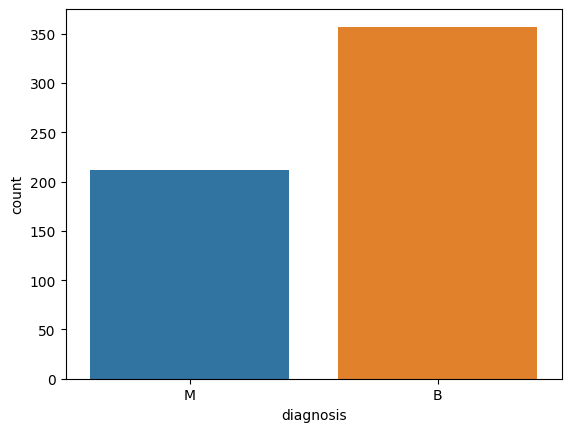

In [115]:
sns.countplot(data=df, x='diagnosis')

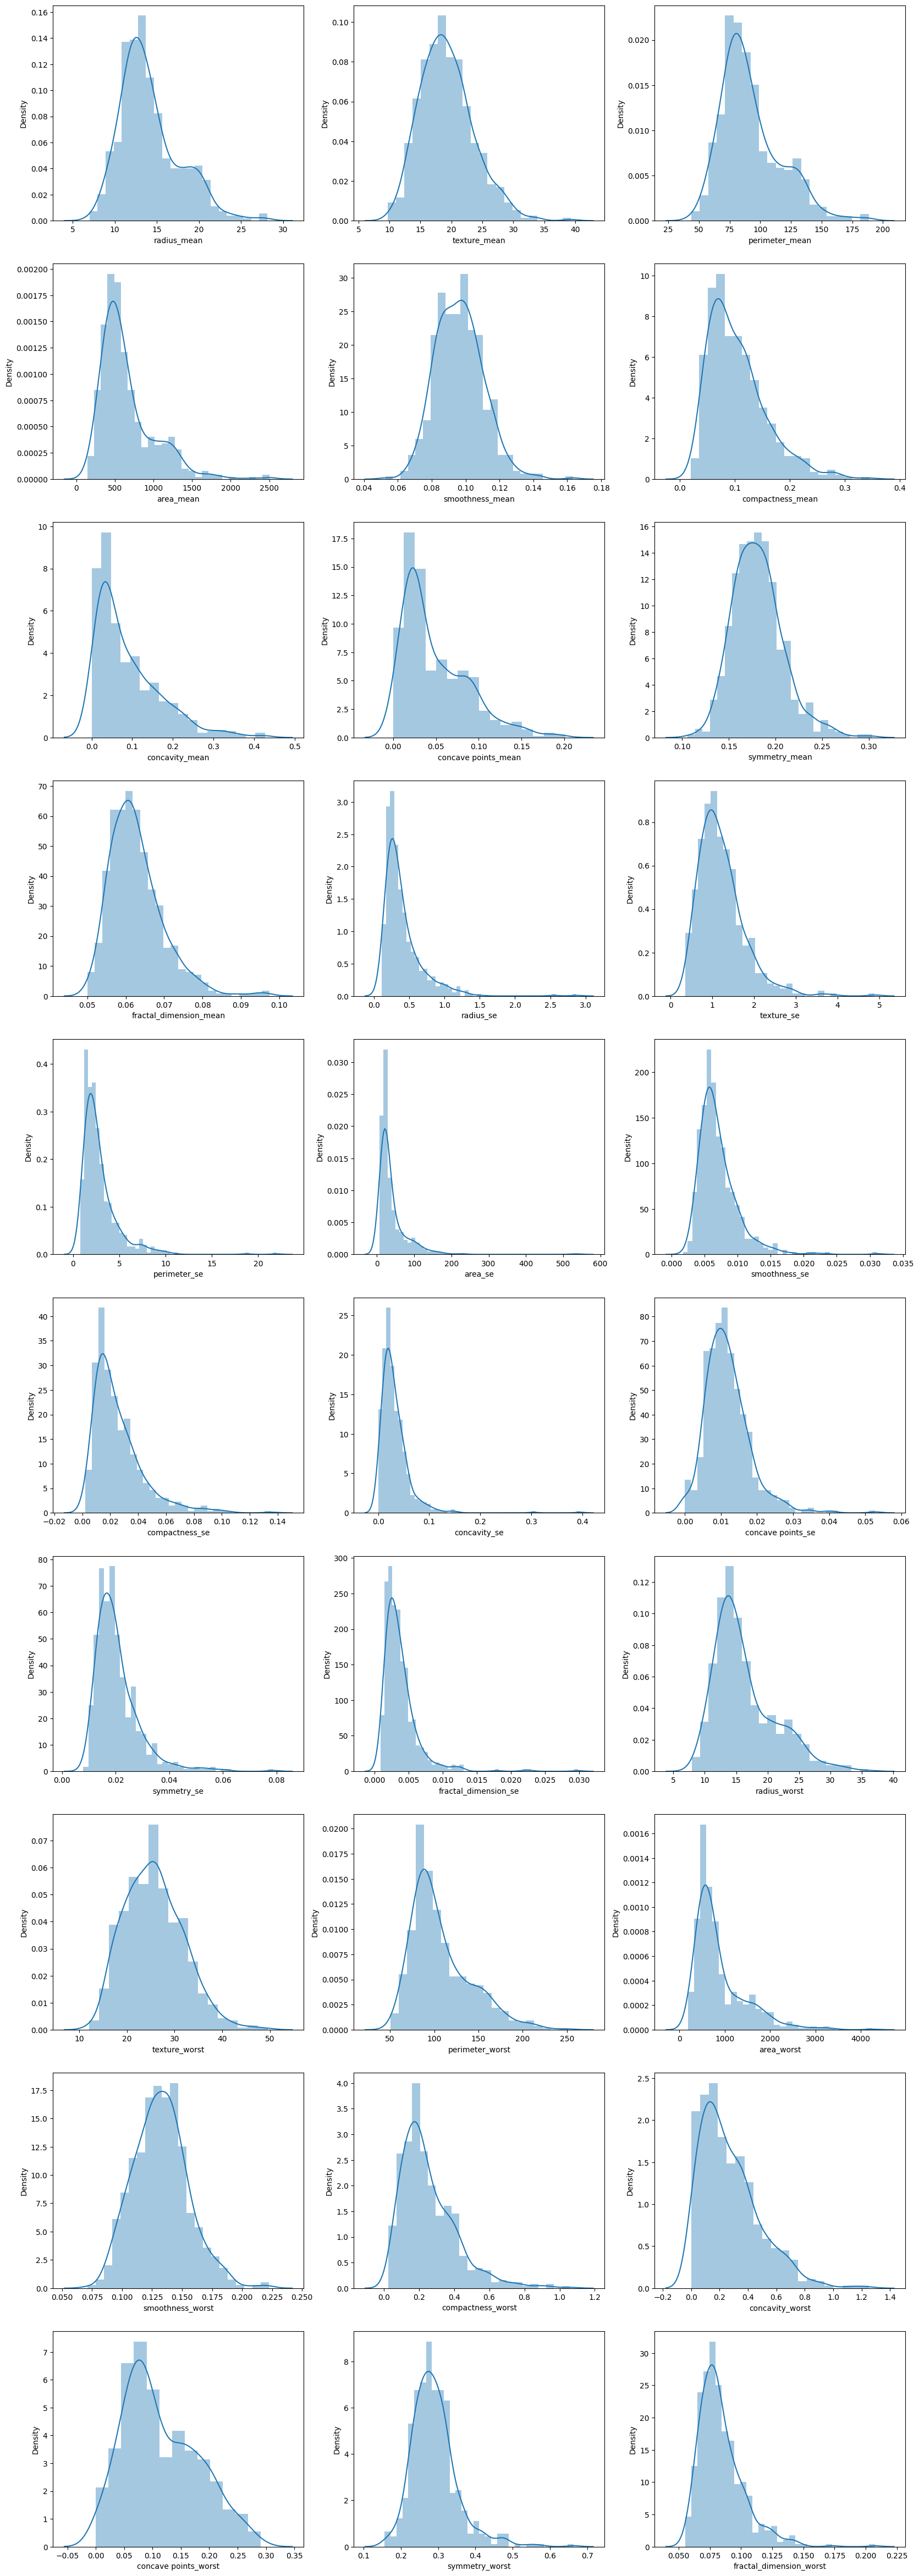

In [116]:
i = 1
plt.figure(figsize=(20,60))
for col in df.select_dtypes('float'):
    plt.subplot(10,3,i)
    sns.distplot(df[col])
    i+=1

In [117]:
benign_df = df[df['diagnosis'] == 'B'] 
malignant_df = df[df['diagnosis'] == 'M']
numerical_features = df.drop('diagnosis', axis=1)

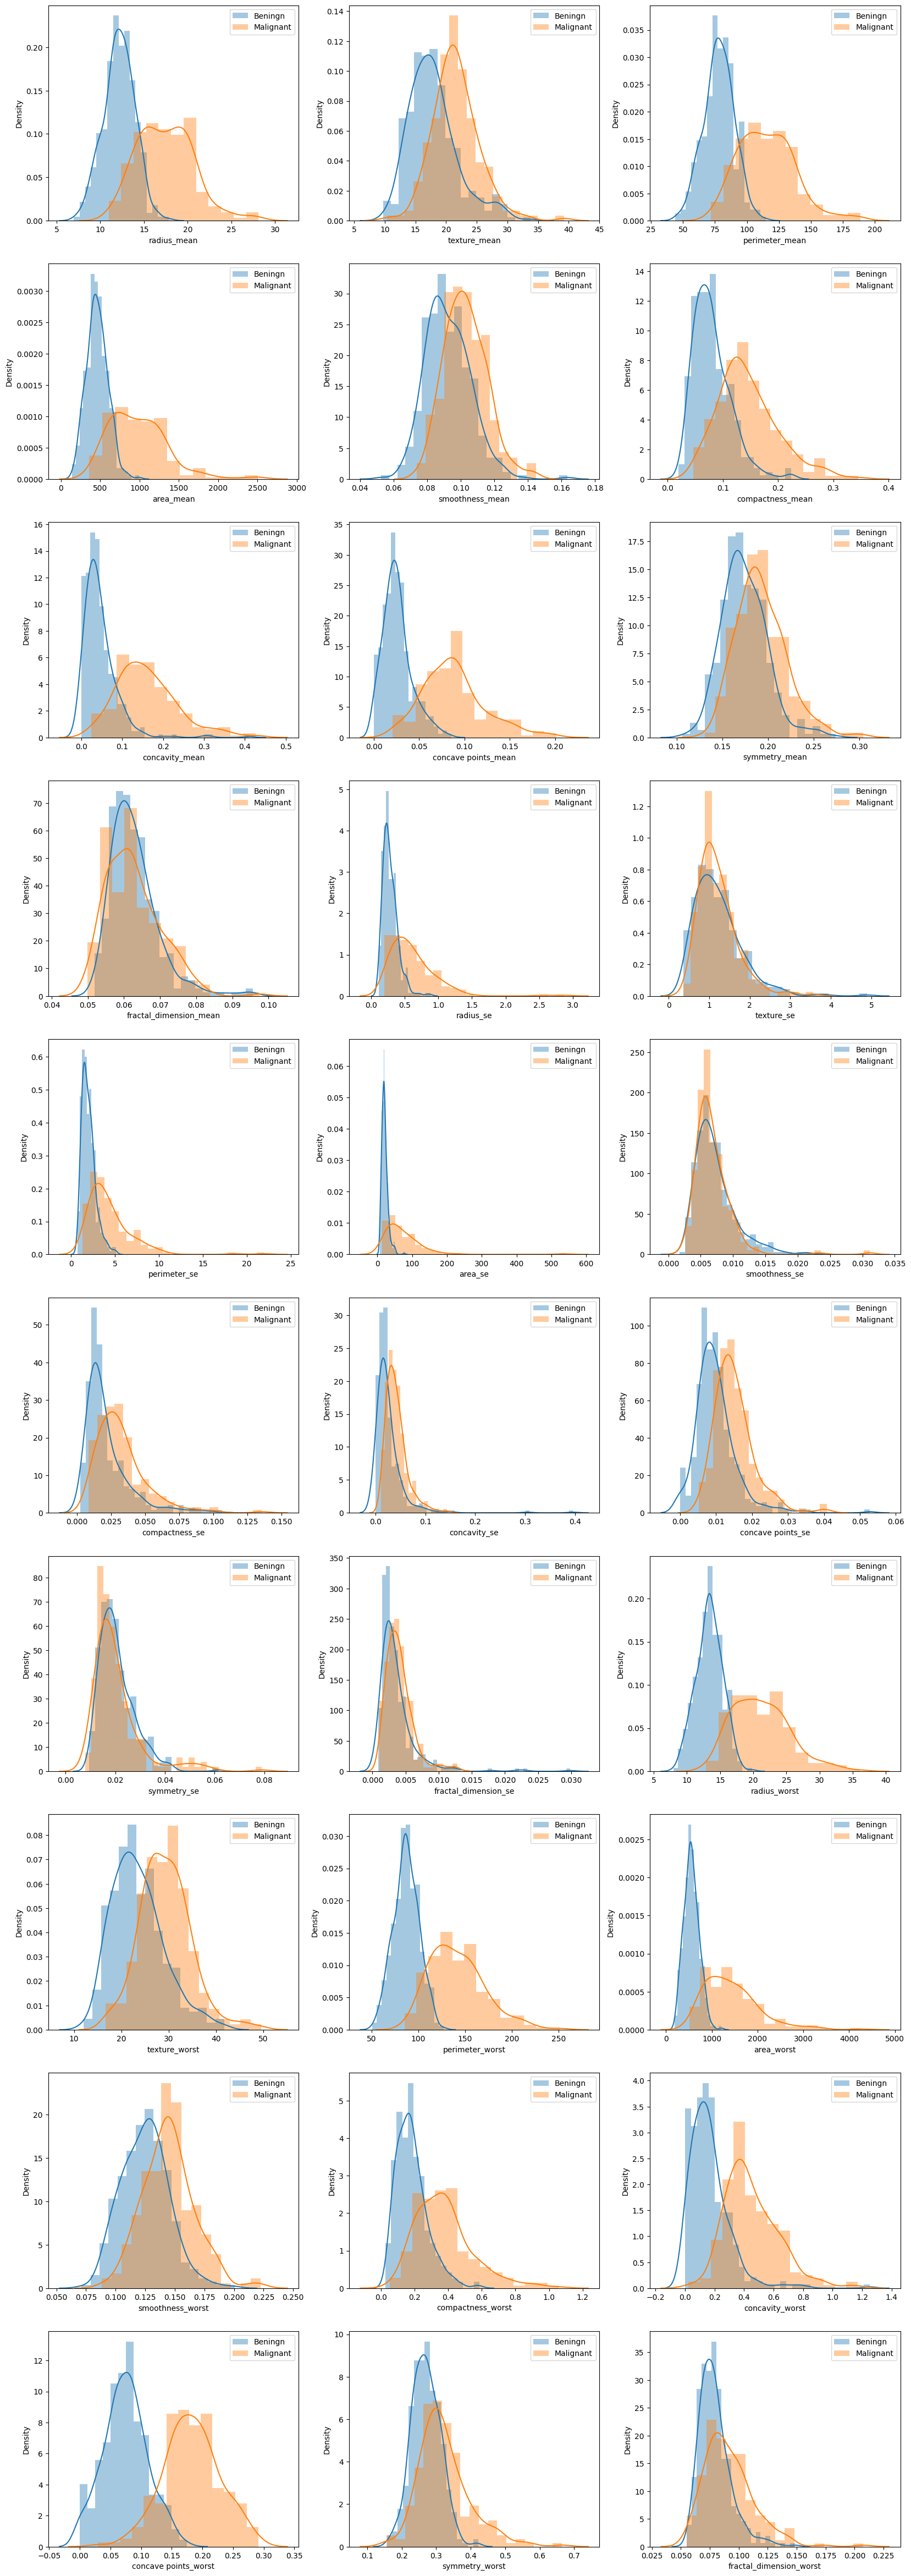

In [118]:
i = 1
plt.figure(figsize=(20,60))
for col in df.select_dtypes('float'):
    plt.subplot(10,3,i)
    sns.distplot(benign_df[col], label = 'Beningn')
    sns.distplot(malignant_df[col], label = 'Malignant')
    plt.legend()
    i+=1

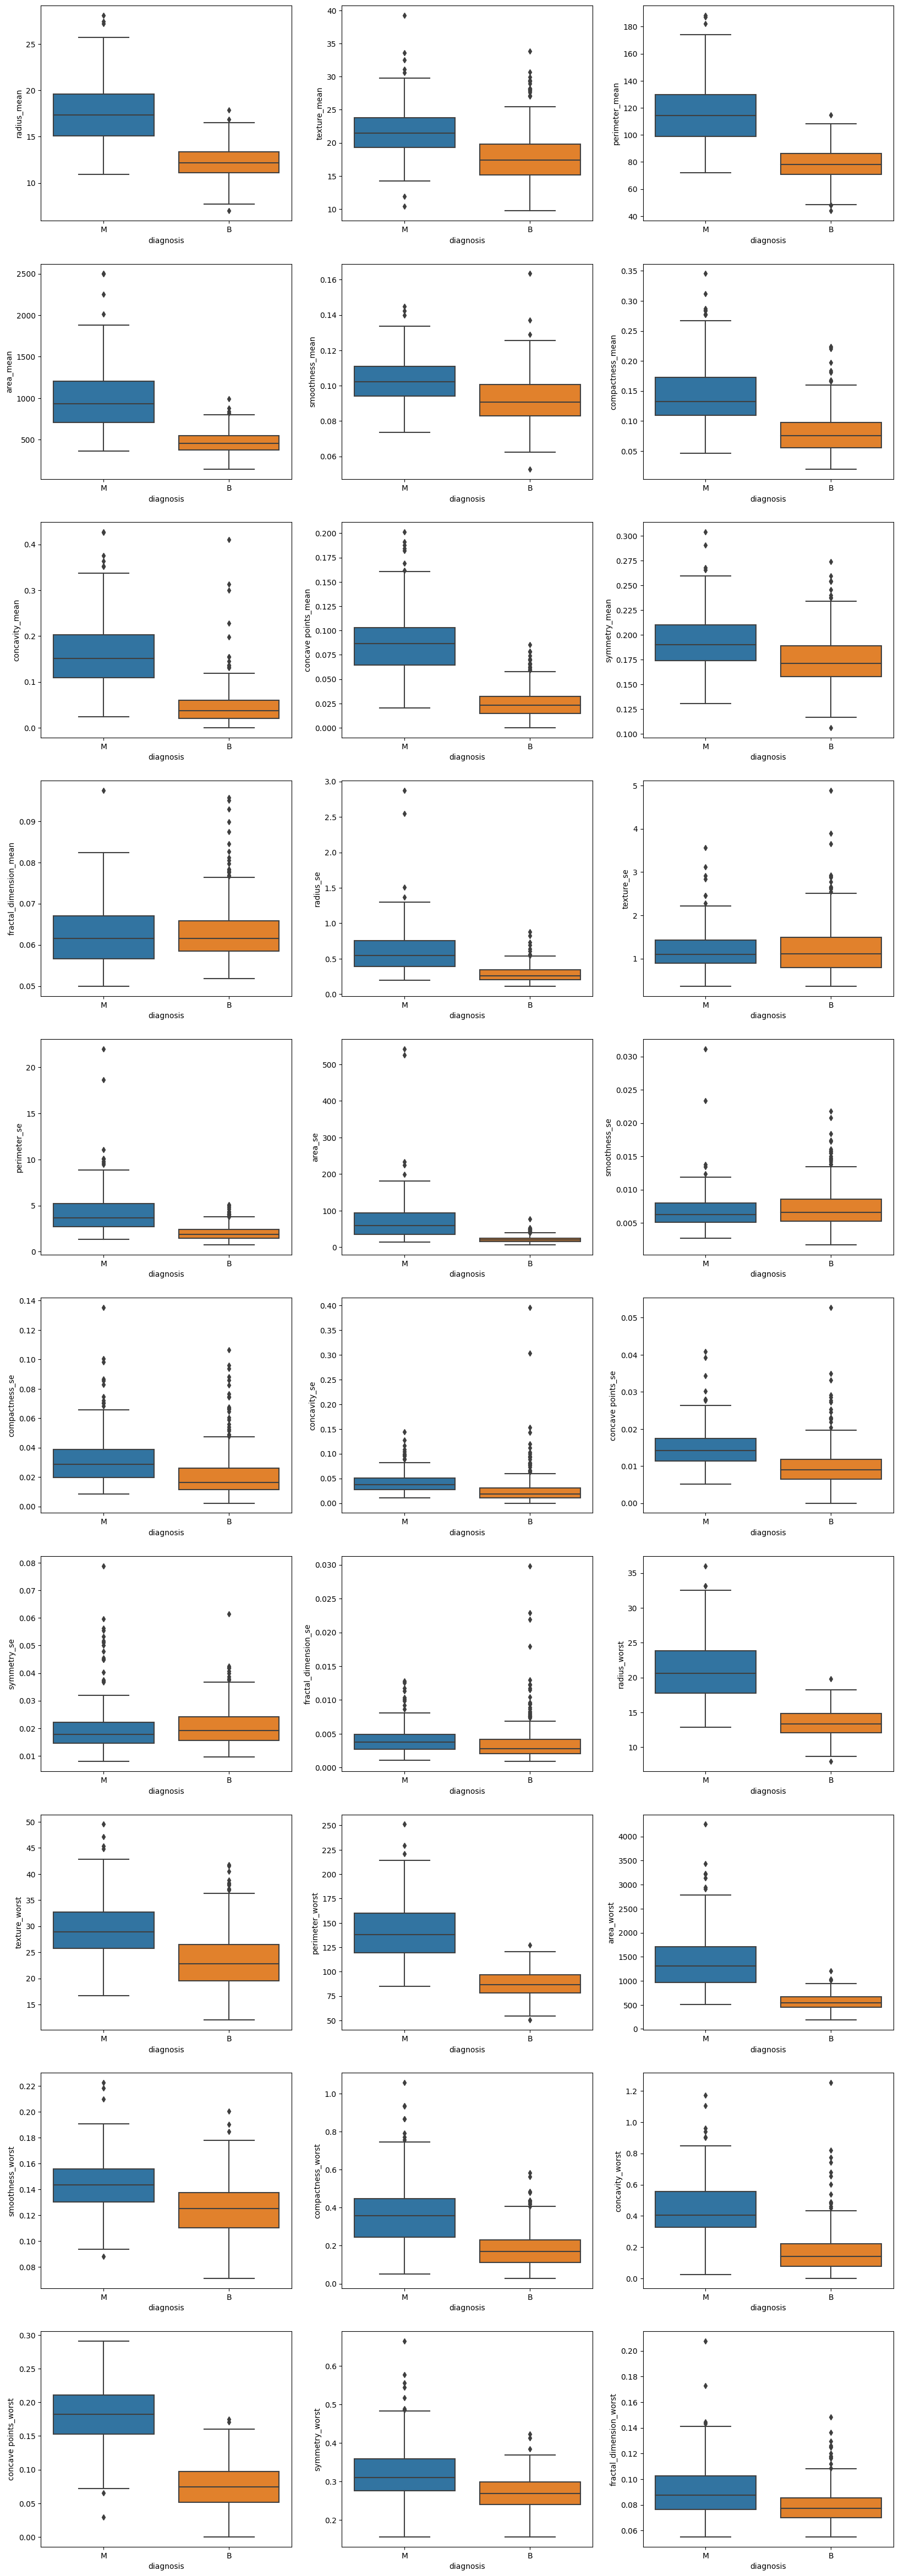

In [119]:
i = 1
plt.figure(figsize=(20,60))
for col in df.select_dtypes('float'):
    plt.subplot(10,3,i)
    sns.boxplot(data=df, x=df['diagnosis'], y=df[col])
    i+=1

<Axes: >

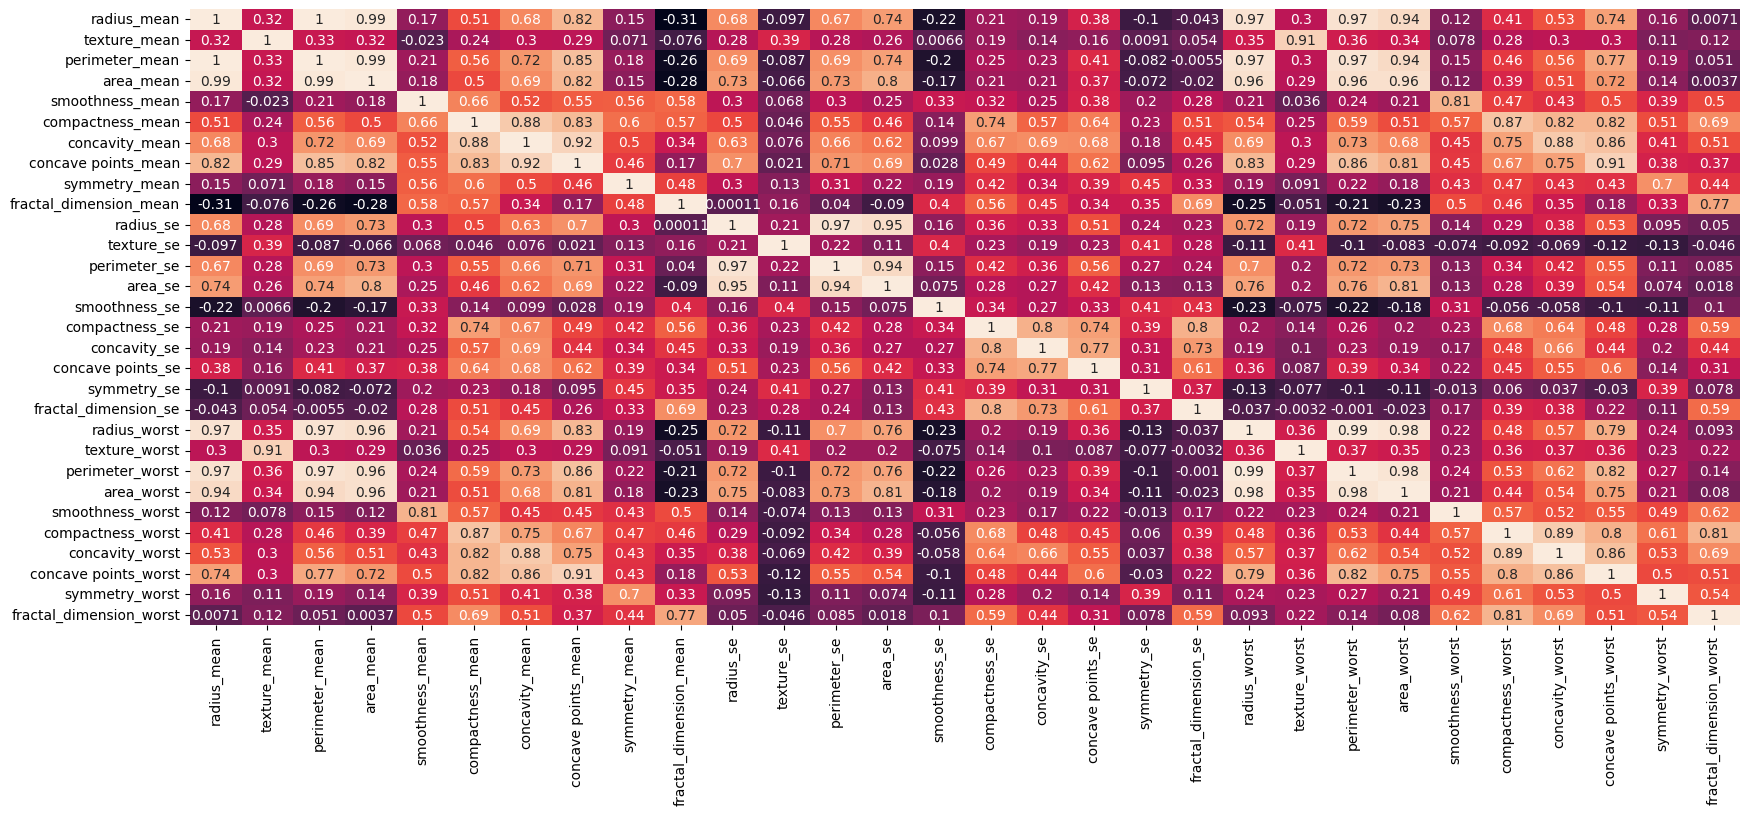

In [120]:
plt.figure(figsize=(20, 8))
sns.heatmap(numerical_features.corr(), annot = True, cbar = False)

In [121]:
print(f'{benign_df.shape}\n{malignant_df.shape}')

(357, 31)
(212, 31)


In [122]:
balanced_benign_df = benign_df.sample(malignant_df.shape[0])

In [123]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_benign_df[col].dropna(), malignant_df[col].dropna())
    if p < alpha:
        return 'h0 rejetée'
    else:
        return 0

In [124]:
for col in numerical_features:
    print(f'{col :-<50} {t_test(col)}')

radius_mean--------------------------------------- h0 rejetée
texture_mean-------------------------------------- h0 rejetée
perimeter_mean------------------------------------ h0 rejetée
area_mean----------------------------------------- h0 rejetée
smoothness_mean----------------------------------- h0 rejetée
compactness_mean---------------------------------- h0 rejetée
concavity_mean------------------------------------ h0 rejetée
concave points_mean------------------------------- h0 rejetée
symmetry_mean------------------------------------- h0 rejetée
fractal_dimension_mean---------------------------- 0
radius_se----------------------------------------- h0 rejetée
texture_se---------------------------------------- 0
perimeter_se-------------------------------------- h0 rejetée
area_se------------------------------------------- h0 rejetée
smoothness_se------------------------------------- 0
compactness_se------------------------------------ h0 rejetée
concavity_se-----------------------

# II. Pre-processing

In [125]:
diagnosis_cat = {
    'M': 0,
    'B': 1
}

In [126]:
df['diagnosis'] = df['diagnosis'].map(diagnosis_cat)

In [127]:
y = df['diagnosis']
x = df.drop(['diagnosis'], axis=1)

In [128]:
print(f'Features: {x.shape}\nTarget: {y.shape}')

Features: (569, 30)
Target: (569,)


- Standarisation des données afin d'optimiser notre dataset 

In [129]:
X = StandardScaler().fit_transform(x)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [131]:
print(f'Train set: {X_train.shape}\nTest set: {X_test.shape}')

Train set: (455, 30)
Test set: (114, 30)


## Comparaison des résultats des estimateurs choisi
- KNN
- Regression Logistique
- Arbre de Décision
- Random Forest
- SVC

In [132]:
models = {
    'LogisticRegression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(random_state=0),
    'DecisionTree': DecisionTreeClassifier(random_state=0),
    'SVC': SVC(random_state=0)
}

In [133]:
def models_evaluation(models):
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        print(f'{name}\nScore: {model.score(X_test, y_test)}')
        print(confusion_matrix(y_test, model.predict(X_test)))
        print(classification_report(y_test, model.predict(X_test)))
        
        N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 30), cv=5, scoring='f1')
        
        plt.plot(N, train_score.mean(axis=1), label = 'train')
        plt.plot(N, val_score.mean(axis=1), label = 'validation')
        plt.xlabel('Train_sizes')
        plt.legend()
        plt.show()

LogisticRegression
Score: 0.9649122807017544
[[45  2]
 [ 2 65]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



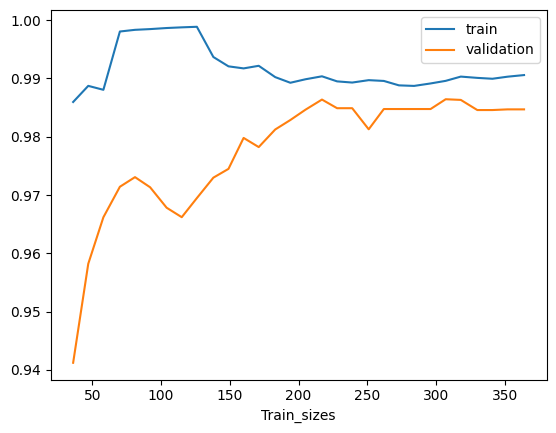

KNN
Score: 0.956140350877193
[[42  5]
 [ 0 67]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



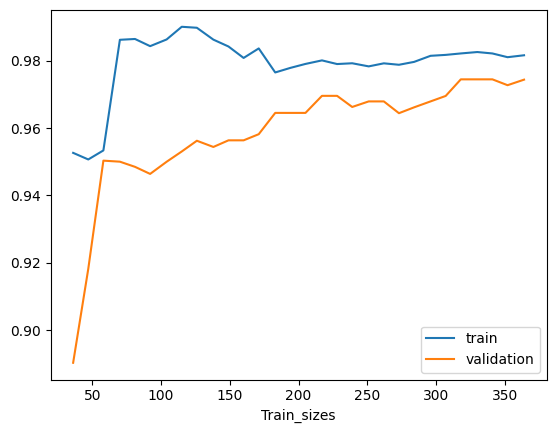

RandomForest
Score: 0.9649122807017544
[[46  1]
 [ 3 64]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



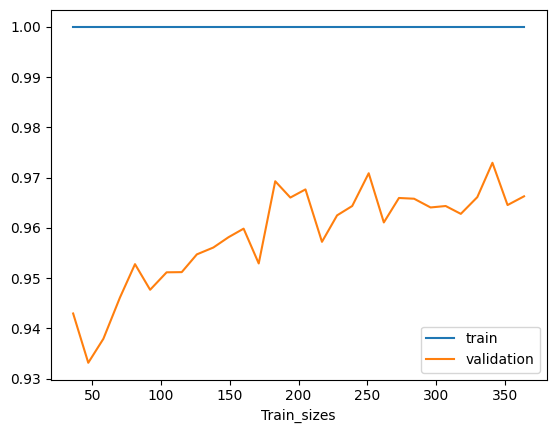

DecisionTree
Score: 0.9122807017543859
[[44  3]
 [ 7 60]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



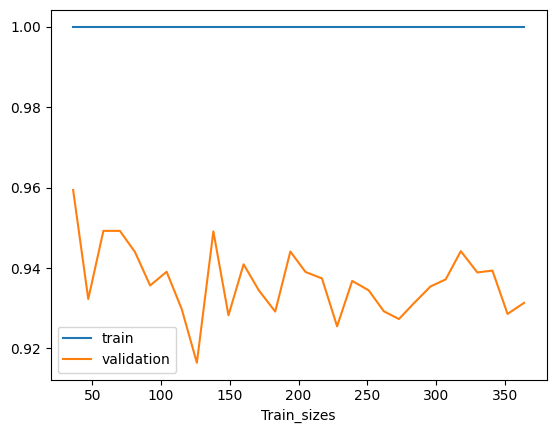

SVC
Score: 0.9736842105263158
[[45  2]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



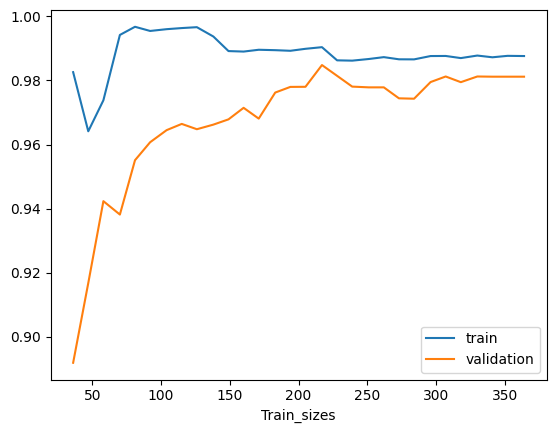

In [134]:
models_evaluation(models)

## Optimisation de l'estimateur LR
- **Score**: 99%
- **Accuracy**: 96%
- **Precision**:
    - *Malignant Cancer (M)*: 96%
    - *Benign Cancer (B)*: 97%
- **Recall**:
    - *Malignant Cancer (M)*: 96%
    - *Benign Cancer (B)*: 97%
- **f1-score**:
    - *Malignant Cancer (M)*: 96%
    - *Benign Cancer (B)*: 97%

In [135]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [136]:
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(1, 11),
    'tol': [1e-1, 1e-2, 1e-2, 1e-4, 1e-5, 1e-6]
}

In [137]:
lr_grid = GridSearchCV(lr_model, param_grid = lr_params, scoring = 'f1', cv = 5)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.1, 0.01, 0.01, 0.0001, 1e-05, 1e-06]},
             scoring='f1')

In [138]:
print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.984699830649209
{'C': 1, 'penalty': 'l2', 'tol': 0.1}


In [139]:
lr_model = lr_grid.best_estimator_
lr_model

LogisticRegression(C=1, tol=0.1)

In [156]:
lr_model.score(X_test, y_test)

0.9649122807017544

In [141]:
def final_model_evaluation(model):

    print(confusion_matrix(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))

    N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 30), cv=5, scoring='f1')

    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('Train_sizes')
    plt.legend()
    plt.show()


[[45  2]
 [ 2 65]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



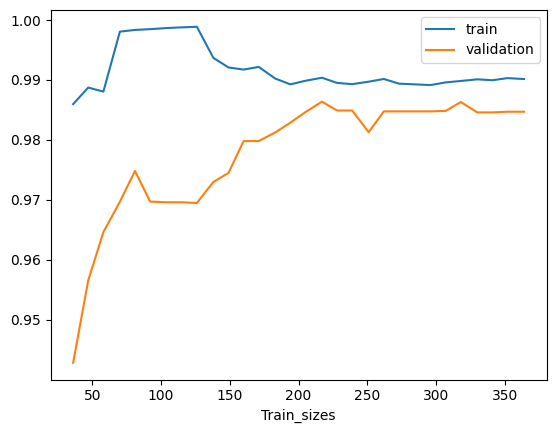

In [142]:
final_model_evaluation(lr_model)

## Optimisation de l'estimateur KNN
- **Score**: 95%
- **Accuracy**: 96%
- **Precision**:
    - *Malignant Cancer (M)*: 98%
    - *Benign Cancer (B)*: 94%
- **Recall**:
    - *Malignant Cancer (M)*: 91%
    - *Benign Cancer (B)*: 99%
- **f1-score**:
    - *Malignant Cancer (M)*: 95%
    - *Benign Cancer (B)*: 96% 

In [143]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [144]:
params_grid = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [145]:
knn_grid = GridSearchCV(knn_model, param_grid = params_grid, scoring='f1', cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='f1')

In [146]:
print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 5}
0.9762110242049733


In [147]:
knn_model = knn_grid.best_estimator_
knn_model

KNeighborsClassifier(metric='manhattan')

In [148]:
knn_model.score(X_test, y_test)

0.956140350877193

[[43  4]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        47
           1       0.94      0.99      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



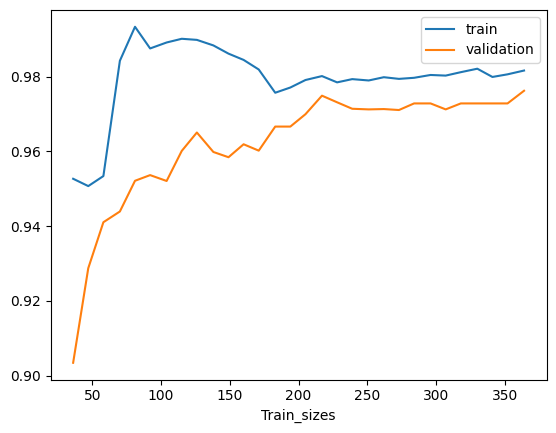

In [149]:
final_model_evaluation(knn_model)

## Optimisation de l'estimateur SVC
- **Score**: 98%
- **Accuracy**: 98%
- **Precision**:
    - *Malignant Cancer (M)*: 98%
    - *Benign Cancer (B)*: 99%
- **Recall**:
    - *Malignant Cancer (M)*: 98%
    - *Benign Cancer (B)*: 99%
- **f1-score**:
    - *Malignant Cancer (M)*: 98%
    - *Benign Cancer (B)*: 99%

In [150]:
svc_params = {
    'C': np.arange(1, 10),
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

In [151]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [152]:
svc_grid = GridSearchCV(svc_model, param_grid = svc_params, scoring = 'f1', cv=5)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto']},
             scoring='f1')

In [153]:
print(svc_grid.best_score_)
print(svc_grid.best_params_)

0.9829301891541669
{'C': 2, 'degree': 1, 'gamma': 'scale'}


In [154]:
svc_model = svc_grid.best_estimator_
svc_model

SVC(C=2, degree=1)

[[46  1]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



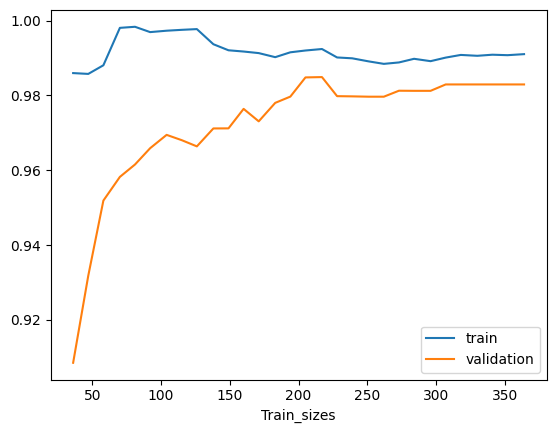

In [155]:
final_model_evaluation(svc_model)